In [1]:
%matplotlib inline

In [2]:
#from google.colab import drive
from skimage import io
im = io.imread('moonlanding.png').astype(float)
imageurl = 'https://scipy-lectures.org/_downloads/moonlanding.png'


# Image denoising by FFT


Denoise an image (:download:`../../../../data/moonlanding.png`) by
implementing a blur with an FFT.

Implements, via FFT, the following convolution:

\begin{align}f_1(t) = \int dt'\, K(t-t') f_0(t')\end{align}

\begin{align}\tilde{f}_1(\omega) = \tilde{K}(\omega) \tilde{f}_0(\omega)\end{align}




Read and plot the image
###########################################################



Text(0.5, 1.0, 'Original Moon landing image')

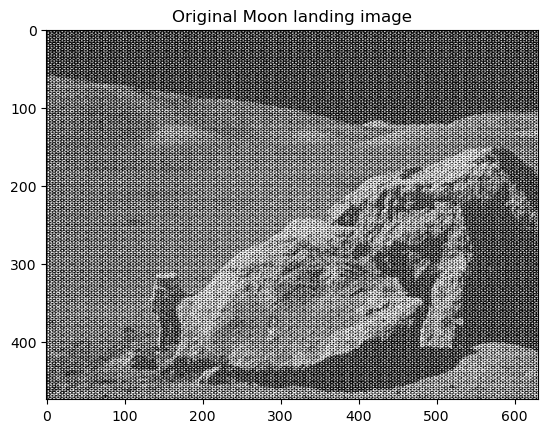

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import urllib.request
#im = plt.imread(imageurl).astype(float)
im = np.array(PIL.Image.open(urllib.request.urlopen(imageurl)))

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original Moon landing image')

In [4]:
#im

Compute the 2d FFT of the input image
###########################################################



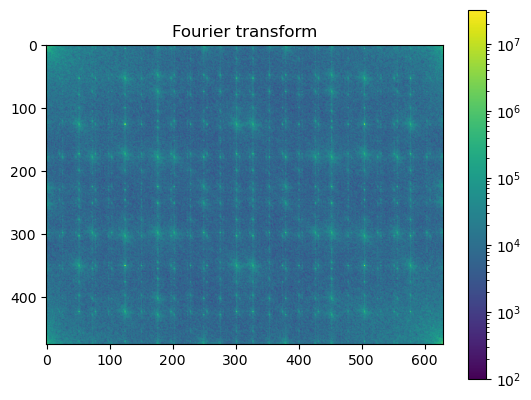

In [5]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=100))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')
plt.savefig('Ch8fft1.png')
plt.show()

In [6]:
#im_fft

Filter in FFT
###########################################################



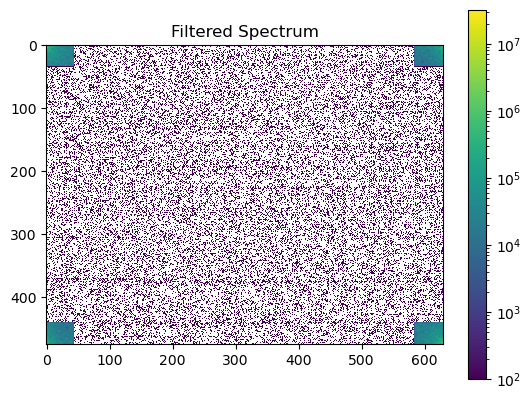

In [7]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.07

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction)),:] = 0.

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0.

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')
plt.savefig('Ch8filteredfft1.png')

Reconstruct the final image
###########################################################



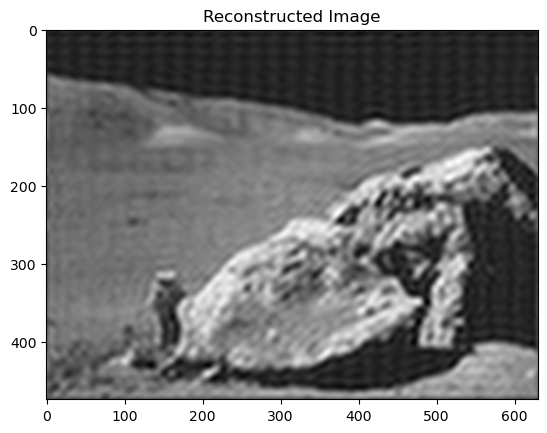

In [8]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')
plt.savefig('Ch8reconstructed1.png')

Easier and better: :func:`scipy.ndimage.gaussian_filter`
###########################################################

 Implementing filtering directly with FFTs is tricky and time consuming.
 We can use the Gaussian filter from :mod:`scipy.ndimage`



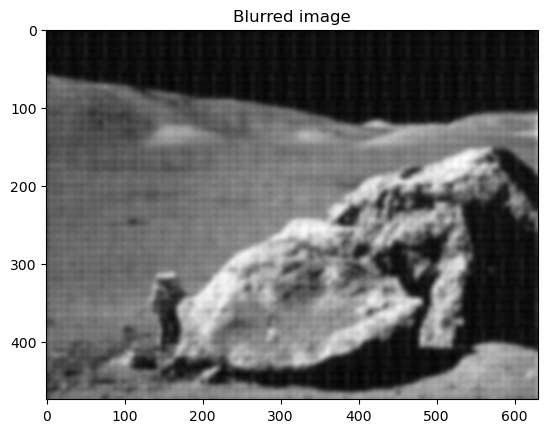

In [13]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 3)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()